In [2]:
#Basic Imports
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import  RandomForestClassifier

import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
df2012 = pd.read_stata('data/SETUPS2012/SETUPS2012.dta')
df2016 = pd.read_stata('data/SETUPS2016/SETUPS2016.dta')
df2020 = pd.read_stata('data/SETUPS2020/SETUPS2020.dta')

In [ ]:
df2012.drop(['CASEID','WEIGHT_FULL'], axis=1, inplace=True)
df2016.drop(['CASEID','WEIGHT'], axis=1, inplace=True)
df2020.drop(['CASEID','WEIGHT'], axis=1, inplace=True)

In [ ]:
def get_columns(df):
    dictionary = {}
    import string
    alphabet = list(string.ascii_uppercase[0:26])
    for char in alphabet:
        dictionary[char] = []
        for num in list(range(df.shape[1])):
            if df.columns[num].startswith(char):
                dictionary[char].append(df.columns[num])
    return dictionary

In [ ]:
_2012_dictionary = get_columns(df2012)
_2016_dictionary = get_columns(df2016)
_2020_dictionary = get_columns(df2020)

In [60]:
df2012.shape, df2016.shape, df2020.shape

((5914, 195), (3649, 204), (7453, 257))

In [62]:
df2020['A02'].value_counts()

1. Joe Biden                    3509
2. Donald Trump                 2566
9. NA                           1199
5. Other candidate {SPECIFY}      84
3. Jo Jorgensen                   71
4. Howie Hawkins                  24
Name: A02, dtype: int64

In [63]:
# drop = ['9. NA', '5. Other candidate {SPECIFY}', '3. Jo Jorgensen', '4. Howie Hawkins']

In [64]:
# df2020.drop(df2020[df2020['A02'] == drop[0]].index, inplace = True)
# df2020.drop(df2020[df2020['A02'] == drop[1]].index, inplace = True)
# df2020.drop(df2020[df2020['A02'] == drop[2]].index, inplace = True)
# df2020.drop(df2020[df2020['A02'] == drop[3]].index, inplace = True)

In [65]:
df2020_Voting_Behavior = df2020.loc[:,df2020.columns.str.startswith('A')]
df2020_Voting_Behavior.drop('A17', axis=1, inplace = True)

C:\Users\rober\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
y = df2020_Voting_Behavior['A02']
X = df2020_Voting_Behavior.drop('A02', axis=1)

# Decision Tree

In [67]:
X = pd.get_dummies(X)

In [68]:
data_train, data_test, target_train, target_test = train_test_split(X, y, random_state=42)

In [69]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

In [70]:
DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=5)

In [81]:
pd.Series(tree_clf.feature_importances_, index=X.columns).nlargest(5)

A08_1. 0 through 24     0.638298
A08_2. 25 through 49    0.135996
A09_1. 0 through 24     0.088878
A15_8. Donald Trump     0.037563
A09_2. 25 through 49    0.037160
dtype: float64

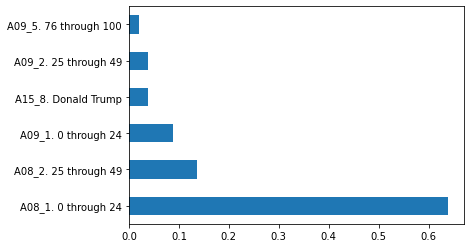

In [83]:
def plot_feature_importances(model, num):
    pd.Series(model.feature_importances_, index=X.columns).nlargest(num).plot(kind='barh',) 

plot_feature_importances(tree_clf, 6)

In [72]:
tree_clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11919095e-03,
       3.17678544e-03, 8.77145907e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.93723905e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.07113034e-04,
       6.38297929e-01, 1.35996118e-01, 1.55245221e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.88779026e-02, 3.71602322e-02,
       0.00000000e+00, 0.00000000e+00, 2.00219300e-02, 0.00000000e+00,
       9.67587236e-04, 0.00000000e+00, 0.00000000e+00, 2.27448221e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.09935675e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.80080916e-04,
      

In [73]:
data_train.columns.values

array(['A01_0. Did not vote', 'A01_1. Voted', 'A01_9. NA',
       'A03_1. Voted for the Democratic candidate',
       'A03_2. Voted for the Republican candidate',
       'A03_3. Voted for some other candidate', 'A03_9. NA',
       'A04_1. Voted for the Democratic candidate',
       'A04_2. Voted for the Republican candidate',
       'A04_3. Voted for some other candidate', 'A04_9. NA',
       'A05_1. Voted for the Democratic candidate',
       'A05_2. Voted for the Republican candidate',
       'A05_3. Voted for some other candidate', 'A05_9. NA',
       'A06_1. Strong Democrat', 'A06_2. Not very strong Democrat',
       'A06_3. Independent-Democrat', 'A06_4. Independent',
       'A06_5. Independent-Republican',
       'A06_6. Not very strong Republican', 'A06_7. Strong Republican',
       'A06_9. NA', 'A07_1. Democratic party', 'A07_2. Republican party',
       "A07_3. None or 'independent'", 'A07_4. Other {SPECIFY}',
       'A07_9. NA', 'A08_1. 0 through 24', 'A08_2. 25 through 49',


In [74]:
pred = tree_clf.predict(data_test)
print(classification_report(target_test, pred))

                 precision    recall  f1-score   support

   1. Joe Biden       0.95      0.96      0.95       888
2. Donald Trump       0.94      0.93      0.93       631

       accuracy                           0.94      1519
      macro avg       0.94      0.94      0.94      1519
   weighted avg       0.94      0.94      0.94      1519



# Random Forest

In [23]:
forest = RandomForestClassifier(n_estimators=50, max_depth= 5)
forest.fit(data_train, target_train)

ValueError: could not convert string to float: '1. Voted'

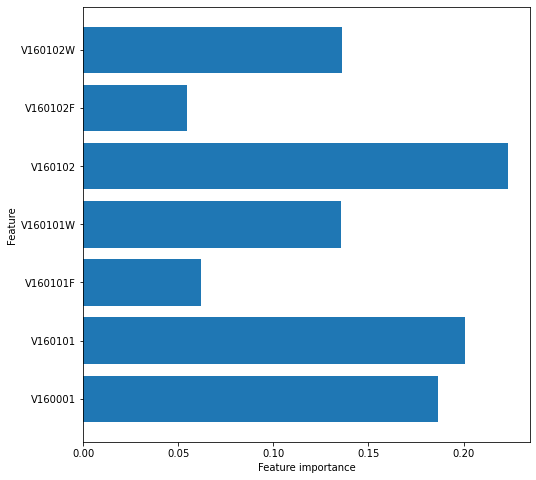

In [30]:
plot_feature_importances(forest)